In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as spd

# Generate data
Generate a random data set for clustering.
 * Import numpy
 * Generate random data using _randn_
 * Separate into two clusters

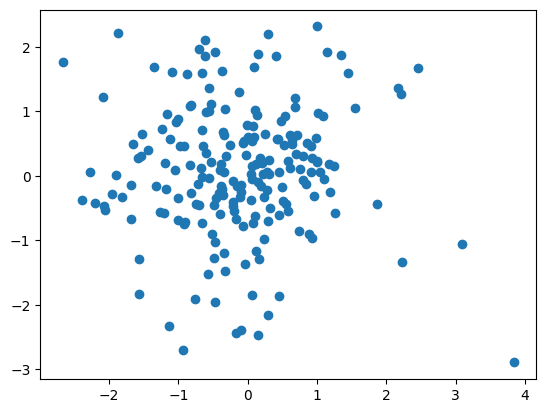

In [2]:
X = np.random.randn(200, 2)
plt.scatter(X[:,0], X[:,1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


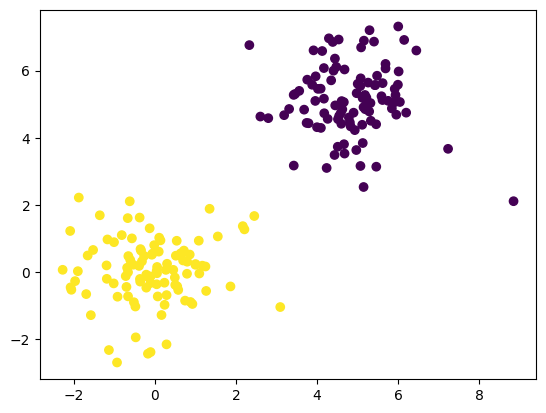

In [3]:
X[100:,:] += 5
C = np.concatenate((np.ones(100), np.zeros(100)))
print(C)
plt.scatter(X[:,0], X[:,1], c=C, cmap="viridis")

In [4]:
def assign_to_cluster(X, C):
  """
  Given the data set X and the cluster centres
  C, identify which cluster centre each data point
  belongs to.
  """
  D = spd.cdist(X, C)
  closest = D.argmin(axis=1)
  return closest

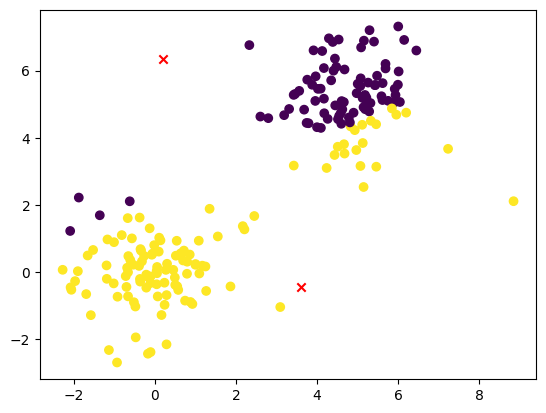

In [5]:
k = 2
C = np.random.uniform(X.min(), X.max(), (k, X.shape[1]))
clusters = assign_to_cluster(X, C)

plt.scatter(X[:,0], X[:,1], c=clusters, cmap="viridis")
plt.scatter(C[:,0], C[:,1], marker="x", c="r")

In [6]:
def kmeans_demo(X, C, k=2):
  """
  Implement the k-means algorithm. As it's a demo, show the working
  of the algorithm at each step with a plot.
  """
  # Generate some cluster centres.
  centres = np.random.uniform(X.min(), X.max(), (k, X.shape[1]))
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(centres[:,0], centres[:,1], marker="x", c="r")

  # Need to record where the previous cluster centres were
  # so that we can tell when to stop.
  old_centres = np.tile(np.inf, centres.shape)

  # For the demo - keep an iteration counter.
  itr = 0

  while not(centres == old_centres).all():
    # Copy the old centres.
    old_centres = centres.copy()
    itr += 1

    # Identify which cluster centre each point in X is closest to.
    clusters = assign_to_cluster(X, centres)

    # Compute the location of the new cluster centres.
    centre = np.zeros_like(centres)
    for i in range(centres.shape[0]):
      I = np.nonzero(clusters == i)[0]
      centres[i,:] = X[I,:].mean(axis=0)

    # Show the progress of the algorithm.
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap="viridis")
    plt.scatter(centres[:,0], centres[:,1], c="r", marker="x")
    plt.title(f"Iteration {itr}")
  
  plt.title(f"Iteration {itr} - cluster centres have converged")

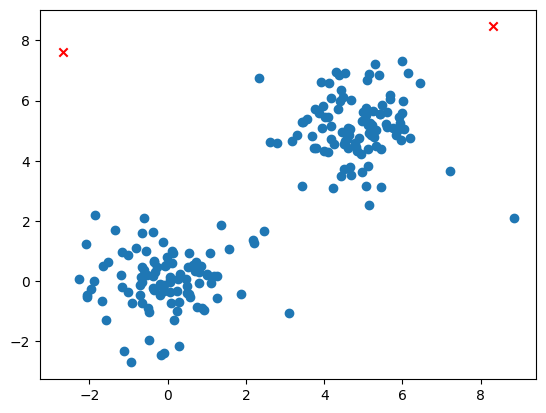

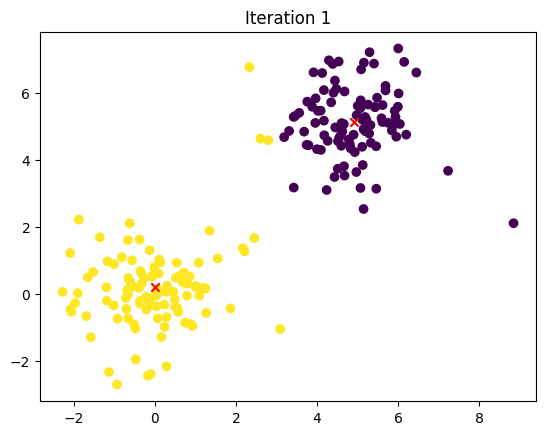

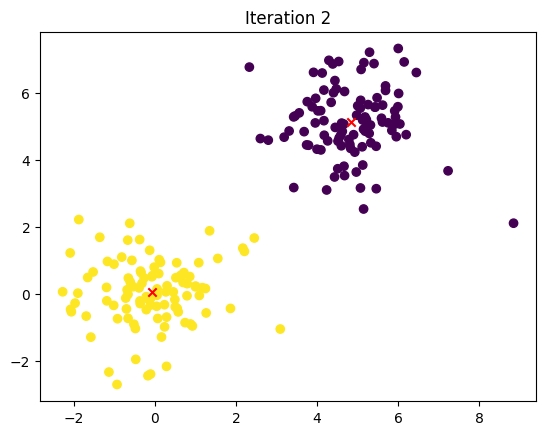

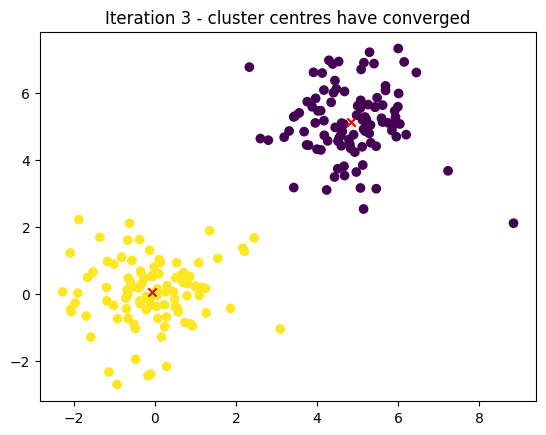

In [7]:
kmeans_demo(X, C)

C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


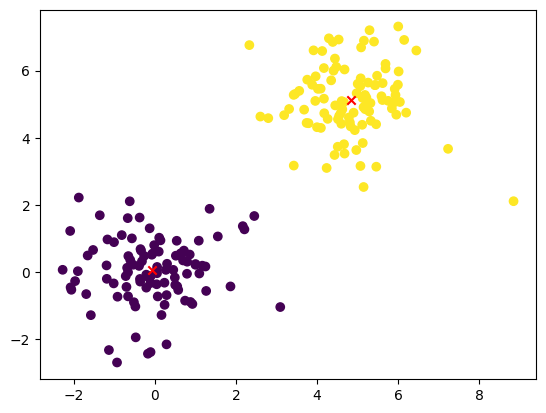

In [8]:
import sklearn.cluster as skc

clusterer = skc.KMeans(n_clusters=2)
clusterer.fit(X)

plt.scatter(X[:,0], X[:,1], c=clusterer.labels_, cmap="viridis")
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], marker="x", c="r")

Text(0.5, 1.0, 'Iris data')

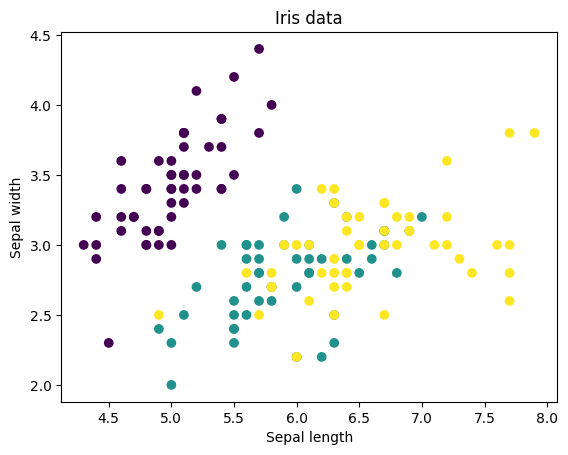

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
t = iris.target

# Plot two Iris attributes against each other.
plt.scatter(X[:,0], X[:,1], c=t, cmap="viridis")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris data")

([], [])

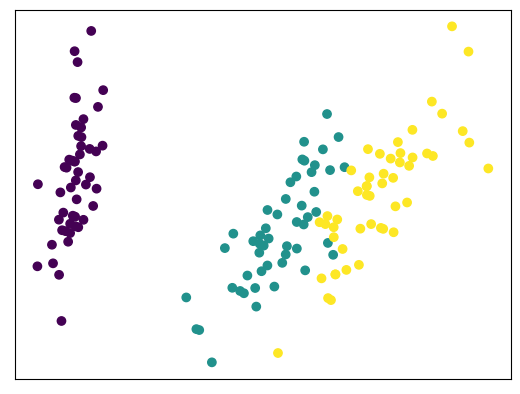

In [10]:
from sklearn import decomposition

# Project Iris data into 2D using PCA.
pca = decomposition.PCA(n_components=2)
projection = pca.fit_transform(X)

# Plot the projection.
plt.scatter(projection[:,0], projection[:,1], c=t, cmap="viridis")
plt.xticks([])
plt.yticks([])

C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


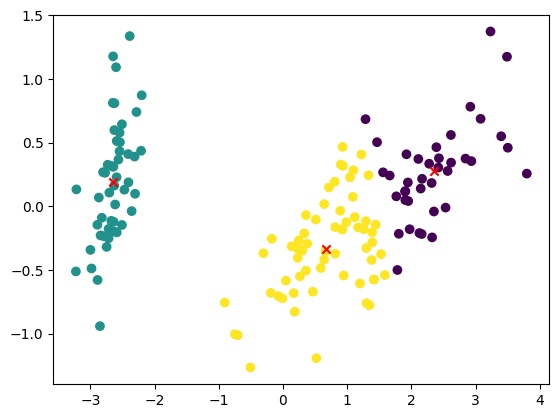

In [11]:
# Apply k-means to the Iris data.
clusterer = skc.KMeans(n_clusters=3)
clusterer.fit(projection)

plt.scatter(projection[:,0], projection[:,1], c=clusterer.labels_, cmap="viridis")
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], marker="x", c="r")

# kNN classifiers

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


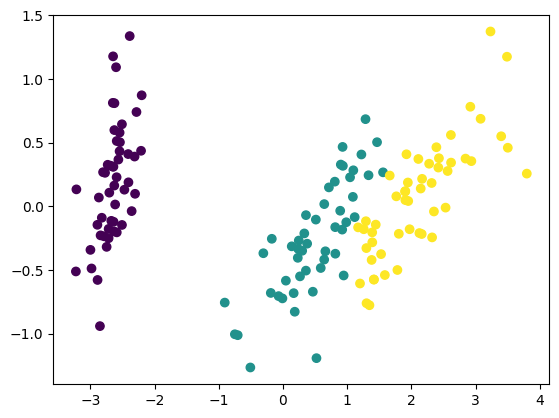

In [12]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier(n_neighbors=7)
classifier.fit(projection, t)
y = classifier.predict(projection)

print(y)
plt.scatter(projection[:,0], projection[:,1], c=y, cmap="viridis")

In [13]:
from sklearn import metrics

conf = metrics.confusion_matrix(t, y)
print(conf)

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


## Training/testing splits

In [14]:
# Split the data into training/testing splits.
I = np.random.permutation(projection.shape[0])

# Use the first 100 points as training.
X_train = projection[I[:100],:]
t_train = t[I[:100]]

# Use the last 50 points as testing.
X_test = projection[I[100:],:]
t_test = t[I[100:]]

# Train the model
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, t_train)
y_train = classifier.predict(X_train)

# Test the model.
y_test = classifier.predict(X_test)

# Evaluate accuracy (training *and* testing).
acc_train = metrics.accuracy_score(t_train, y_train)
acc_test = metrics.accuracy_score(t_test, y_test)
print(f"Training score: {acc_train}, testing accuracy: {acc_test}")

Training score: 0.96, testing accuracy: 0.98


([<matplotlib.axis.YTick at 0x1585fa02a90>,
 [Text(0, 0, 'Predicted class 0'),
  Text(0, 1, 'Predicted class 1'),
  Text(0, 2, 'Predicted class 2')])

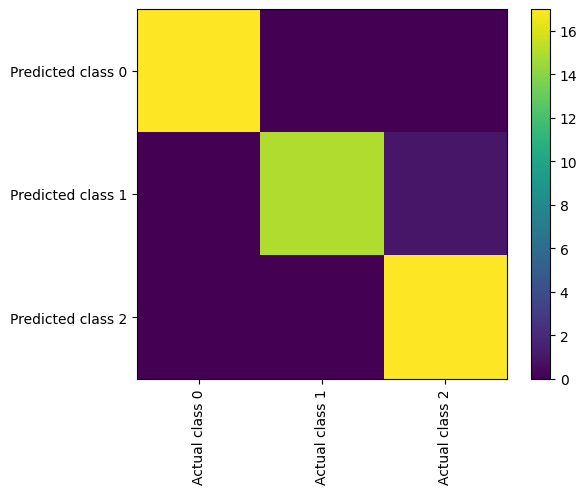

In [15]:
# Produce a confusion matrix of these results.
conf = metrics.confusion_matrix(t_test, y_test)
plt.imshow(conf)
plt.colorbar()
plt.xticks(range(3), [f"Actual class {i}" for i in range(3)], rotation=90)
plt.yticks(range(3), [f"Predicted class {i}" for i in range(3)])